In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [174]:
data3 = xr.open_dataset("SI_non_dim_visc.nc")

In [175]:
S2 = 0.25
gamma = 0.81 #0.5*(1+(1+2)**(-1))
omega1 = data3.growth_rate #.isel(delta=0,N=0,gamma_index=0) #np.linspace(0,1.6,41)#np.arange(0,1.5,0.01)

##### S2

In [176]:
omega1

<xarray.DataArray 'growth_rate' (k: 22)>
[22 values with dtype=float64]
Coordinates:
  * k        (k) float64 0.1 1.1 2.1 3.1 4.1 5.1 ... 17.1 18.1 19.1 20.1 21.1

In [177]:
def theta(omega):
    top = -1*(1+omega**2)*(1-gamma)+gamma*S2
    bottom = 1+omega**2
    return -1*(top/bottom)**(0.5)

In [178]:
def k(omega):
    t = theta(omega)
    tp = (1+S2+omega**2)*(np.arctan(t)+np.pi)
    bttm = S2*(-1*(1+omega**2)*(1-gamma)+gamma*S2)
    return tp/(bttm)**(0.5)

In [179]:
def k_shift(omega,q):
    tp = (1+S2+np.power(omega,2))*(q)
    bttm = S2*(-1*(1+np.power(omega,2))*(1-gamma)+gamma*S2)
    return tp/(bttm)**(0.5)

In [180]:
def w_max():
    return (gamma*S2/(1-gamma)-1)**(0.5)

In [181]:
k_list = k(omega1)

In [182]:
theta(omega1)

<xarray.DataArray 'growth_rate' (k: 22)>
array([-0.1118034 , -0.11045704, -0.09833565, -0.02382169,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan])
Coordinates:
  * k        (k) float64 0.1 1.1 2.1 3.1 4.1 5.1 ... 17.1 18.1 19.1 20.1 21.1

In [183]:
omega1[:]

<xarray.DataArray 'growth_rate' (k: 22)>
array([0.      , 0.03847 , 0.119054, 0.250231, 0.47721 , 0.686794, 0.847151,
       0.974845, 1.079802, 1.16781 , 1.242532, 1.306449, 1.361327, 1.408473,
       1.44888 , 1.483326, 1.512423, 1.536666, 1.556452, 1.572108, 1.583897,
       1.592033])
Coordinates:
  * k        (k) float64 0.1 1.1 2.1 3.1 4.1 5.1 ... 17.1 18.1 19.1 20.1 21.1

In [184]:
k_list[:]

<xarray.DataArray 'growth_rate' (k: 22)>
array([ 67.75848654,  68.64495712,  77.7057557 , 333.31265969,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan])
Coordinates:
  * k        (k) float64 0.1 1.1 2.1 3.1 4.1 5.1 ... 17.1 18.1 19.1 20.1 21.1

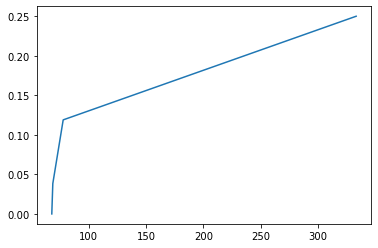

In [185]:
plt.plot(k_list[:],omega1[:])
# plt.xticks(np.arange(8,32,1))
plt.show()

In [186]:
# data3.growth_rate.isel(delta=0,N=0,t=0,gamma_index=0).values
data3

<xarray.Dataset>
Dimensions:      (k: 22)
Coordinates:
  * k            (k) float64 0.1 1.1 2.1 3.1 4.1 ... 17.1 18.1 19.1 20.1 21.1
Data variables:
    growth_rate  (k) float64 0.0 0.03847 0.1191 0.2502 ... 1.572 1.584 1.592

Text(0, 0.5, 'Growth Rate')

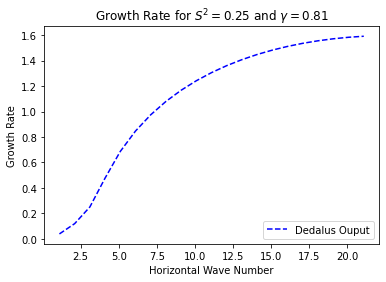

In [187]:
shft = 0 #2.45#4*np.pi/6
k_m = data3.k[:]+k_shift(data3.growth_rate,shft)[:]
plt.plot(data3.k[1:],data3.growth_rate.isel()[1:],color="b",linestyle="dashed",label="Dedalus Ouput")
# plt.plot(k_list[0,:],omega1[0,:],linestyle="dashed",c="r", label="Analytic solution")
# plt.hlines(w_max(),xmin=np.min([np.array([k_list[0]]),k_m.values[0]]),xmax=np.max([np.array([k_list[-1]]),k_m.values[-1]]),linestyles="dotted",color="k",label="Upper Limit of Analytical Solution")
plt.legend(loc="lower right")
plt.title(f"Growth Rate for $S^2=${S2} and $\gamma=${gamma}")
plt.xlabel("Horizontal Wave Number")
plt.ylabel("Growth Rate")

In [173]:
diff = (k_list[0,:]-data3.k[:])
omg = data3.growth_rate.isel(delta=0,N=0,gamma_index=0)
top= (1+S2+np.power(omg,2))
bttm = S2*(-1*(1+np.power(omg,2))*(1-gamma)+gamma*S2)
np.median(diff*(bttm)**(0.5)/top)

IndexError: too many indices

In [ ]:
diff*(bttm)**(0.5)/top

In [ ]:
k_shift(data3.growth_rate.isel(delta=0,N=0,gamma_index=0),shft)[:]

In [ ]:
data4=xr.open_dataset("SI_non_dim_field.nc")

In [ ]:
k_m = data4.k[:]
plt.plot(k_m[:],data4.growth_rate.isel(delta=0,N=0,gamma_index=0)[:],color="b",linestyle="dashed",label="Dedalus Ouput")
plt.xlabel("Horizontal Wavenumber")
plt.ylabel("Growth Rate")

In [ ]:
data5=xr.open_dataset("PSI_non_dim_field_high_res.nc")

In [ ]:
data5.t

In [ ]:
plt.plot(data5.v_structure.isel(k=15,t=2),data5.z)
plt.ylabel("Vertical Height")
plt.xlabel("v-velocity")

In [ ]:
plt.pcolormesh(data5.z,data5.t,data5.v_structure.sel(k=16) )